# Code

## Initialize

### Path

In [1]:
path = './US_ChronicDiseaseIndicators.csv'

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
from sklearn.model_selection import train_test_split
import tensorflow as tf

2024-12-11 12:26:02.806051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-11 12:26:03.488847: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-12-11 12:26:03.488884: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-12-11 12:26:05.199608: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

## Implement

### 1-a) Trend Analysis: Examine how the selected indicator has changed over time, identifying any trends (e.g., increasing or decreasing rates).

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv(path)

# Function to plot trends for each topic across all data
def plot_trends_for_all_topics(data):
    # Ensure 'yearstart' and 'datavalue' are numeric
    data['yearstart'] = pd.to_numeric(data['yearstart'], errors='coerce')
    data['datavalue'] = pd.to_numeric(data['datavalue'], errors='coerce')

    # Drop rows with missing values in critical columns
    data = data.dropna(subset=['yearstart', 'datavalue', 'topic'])

    # Group data by yearstart and topic to compute mean datavalue for each year-topic pair
    grouped_data = (
        data.groupby(['yearstart', 'topic'], as_index=False)
        .agg({'datavalue': 'mean'})
    )

    # Ensure yearstart has a continuous range (step of 1) by reindexing
    min_year, max_year = int(grouped_data['yearstart'].min()), int(grouped_data['yearstart'].max())
    full_years = pd.DataFrame({'yearstart': range(min_year, max_year + 1)})

    # Loop through each topic and plot its trend
    for topic in grouped_data['topic'].unique():
        # Filter data for each topic
        topic_data = grouped_data[grouped_data['topic'] == topic]

        # Merge with the full range of years to ensure no missing years
        topic_data = pd.merge(full_years, topic_data, on='yearstart', how='left').fillna({'datavalue': 0})

        # Create an interactive line plot
        fig = px.line(
            topic_data,
            x='yearstart',
            y='datavalue',
            title=f"Trends of Data Values for Topic '{topic}'",
            labels={'yearstart': 'Year', 'datavalue': 'Average Data Value'},
            hover_data={'datavalue': ':.2f'},
            markers=True  # Add markers to the line
        )

        # Update layout for better display
        fig.update_layout(
            height=600,
            width=1000,
            legend_title="Topic",
            hovermode="x unified",
            xaxis=dict(title='Year', dtick=1),  # Ensure step of 1 on the x-axis
            yaxis=dict(title='Average Data Value'),
        )

        # fig.show()

        # Save the plot as an HTML file
        file_name = f"./line_plots(topic)/{topic}_trend.html"  # Customize the filename as needed
        fig.write_html(file_name)
        # print(f"Plot for topic '{topic}' saved as {file_name}")

# Example usage
plot_trends_for_all_topics(data)


### 1-b) Geographic Analysis: Analyze the variations in the selected indicator across different states or regions

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv(path)

# Function to plot lines for each topic in a specific location
def plot_trends_for_location(data, location):
    # Ensure 'yearstart' and 'datavalue' are numeric
    data['yearstart'] = pd.to_numeric(data['yearstart'], errors='coerce')
    data['datavalue'] = pd.to_numeric(data['datavalue'], errors='coerce')

    # Drop rows with missing values in critical columns
    data = data.dropna(subset=['yearstart', 'datavalue', 'locationdesc', 'topic'])

    # Filter data for the specified location
    location_data = data[data['locationdesc'] == location]

    location_data = (
        location_data.groupby(['yearstart', 'topic'], as_index=False)
        .agg({'datavalue': 'mean'})
    )

    # Loop through each topic and plot its trend in the specified location
    for topic in location_data['topic'].unique():
        # Filter data for each topic
        topic_data = location_data[location_data['topic'] == topic]

        # Create an interactive plot
        fig = px.line(
            topic_data,
            x='yearstart',
            y='datavalue',
            title=f"Interactive Trends of Data Values for Topic '{topic}' in {location.title()}",
            labels={'yearstart': 'Year', 'datavalue': 'Average Data Value'},
            hover_data={'datavalue': ':.2f', 'topic': True},
            markers='O'
        )

        # Update layout for better display
        fig.update_layout(
            height=600,
            width=1000,
            legend_title="Topic",
            hovermode="x unified",
            xaxis=dict(title='Year'),
            yaxis=dict(title='Average Data Value'),
        )

        # # Show the plot
        # fig.show()

        # Save the plot as an HTML file
        file_name = f"./line_plots(location)/{location}_{topic}_trend.html"  # Customize the filename as needed
        fig.write_html(file_name)
        # print(f"Plot for {topic} in {location} saved as {file_name}")

# Function to generate interactive plots for all locations
def plot_trends_for_all_locations(data):
    # Get unique locations
    unique_locations = data['locationdesc'].dropna().unique()

    # Loop through each location and plot
    for location in unique_locations:
        # print(f"Generating interactive plot for location: {location}")
        plot_trends_for_location(data, location)
        # print('\n\n*********************************************************\n\n')

# Example usage
plot_trends_for_all_locations(data)

### 1-c) Correlation Analysis: Investigate the relationships between various health indicators to determine if they are correlated.

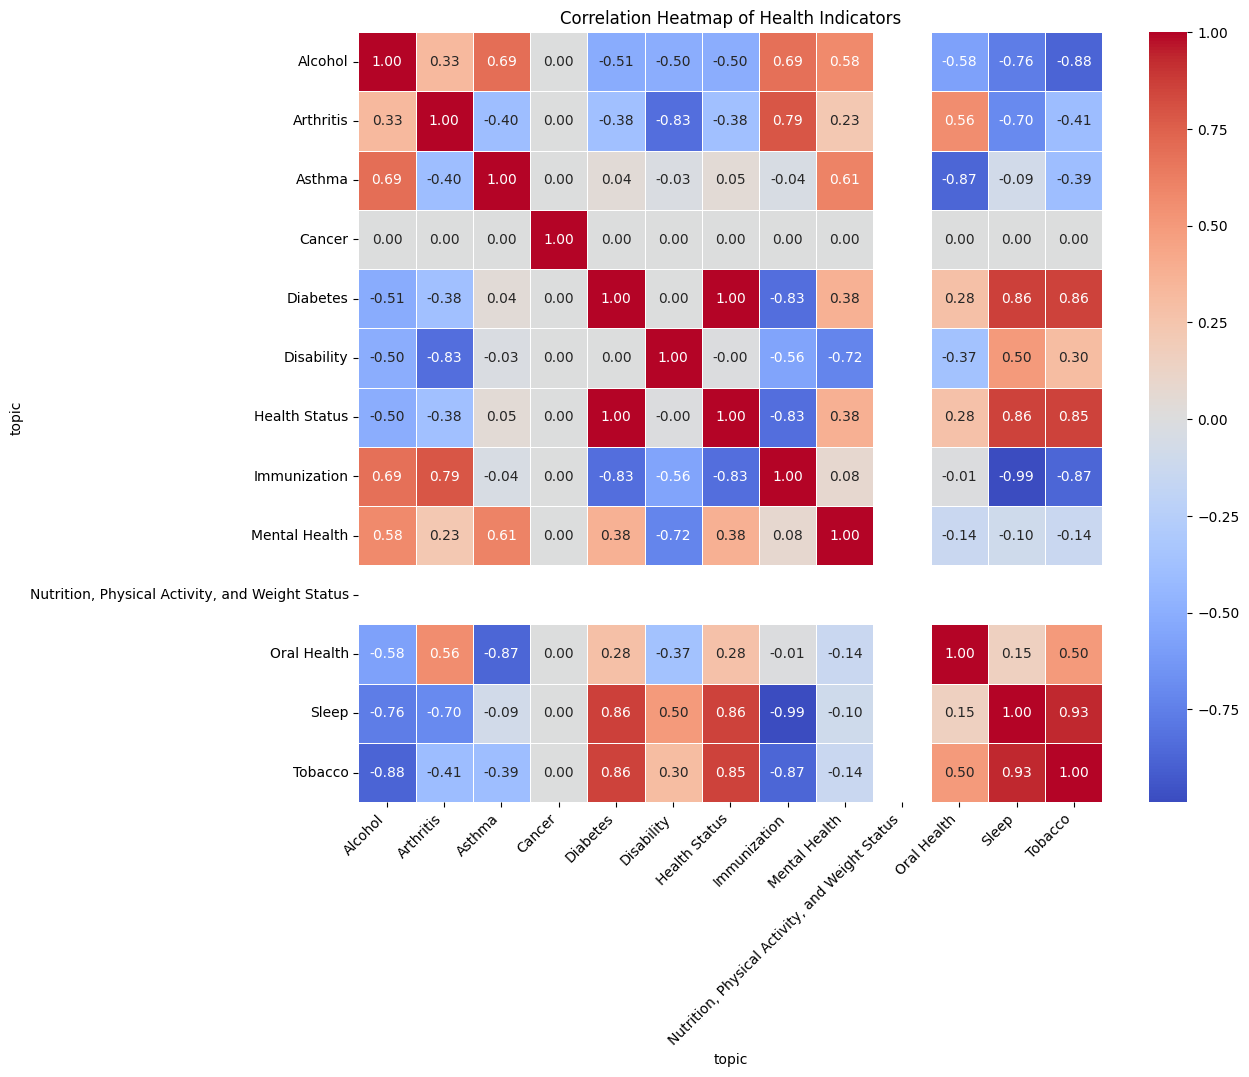

Strong Correlations (|correlation| > 0.7):
topic           Alcohol  Arthritis   Asthma  Diabetes  Disability  \
topic                                                               
Alcohol             NaN        NaN      NaN       NaN         NaN   
Arthritis           NaN        NaN      NaN       NaN   -0.833926   
Asthma              NaN        NaN      NaN       NaN         NaN   
Diabetes            NaN        NaN      NaN       NaN         NaN   
Disability          NaN  -0.833926      NaN       NaN         NaN   
Health Status       NaN        NaN      NaN  0.999948         NaN   
Immunization        NaN   0.786109      NaN -0.831350         NaN   
Mental Health       NaN        NaN      NaN       NaN   -0.723245   
Oral Health         NaN        NaN -0.86553       NaN         NaN   
Sleep         -0.763352        NaN      NaN  0.862110         NaN   
Tobacco       -0.879604        NaN      NaN  0.858083         NaN   

topic          Health Status  Immunization  Mental Health  

In [ ]:
# Load the dataset
data = pd.read_csv(path)

# Step 1: Filter data for relevant topics
indicators = [
    'Diabetes', 'Sleep', 'Asthma', 'Health Status', 'Mental Health',
    'Alcohol', 'Arthritis', 'Tobacco', 'Disability', 'Immunization',
    'Oral Health', 'Nutrition, Physical Activity, and Weight Status', 'Cancer'
]
filtered_data = data[data['topic'].isin(indicators)]

# Ensure yearstart and datavalue are numeric
filtered_data['yearstart'] = pd.to_numeric(filtered_data['yearstart'], errors='coerce')
filtered_data['datavalue'] = pd.to_numeric(filtered_data['datavalue'], errors='coerce')

# Drop rows with missing critical values
filtered_data = filtered_data.dropna(subset=['yearstart', 'datavalue'])

# Step 2: Reshape the data (pivot table)
pivot_data = filtered_data.pivot_table(
    index='yearstart',  # Group by year
    columns='topic',    # Use topics as columns
    values='datavalue', # Use data values for analysis
    aggfunc='mean'      # Average values if there are duplicates
)

# Step 3: Fill missing values (optional, using mean of each column)
pivot_data = pivot_data.fillna(pivot_data.mean())

# Step 4: Compute the correlation matrix
correlation_matrix = pivot_data.corr(method='pearson')  # Use 'spearman' or 'kendall' if needed

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    linewidths=0.5
)
plt.title("Correlation Heatmap of Health Indicators")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Step 6: Identify strong correlations (|correlation| > 0.7)
strong_correlations = correlation_matrix[(correlation_matrix.abs() > 0.7) & (correlation_matrix != 1.0)]
print("Strong Correlations (|correlation| > 0.7):")
print(strong_correlations.dropna(how='all', axis=0).dropna(how='all', axis=1))

### 1-d) Time Series Analysis: Utilize historical data to predict future trends for the chosen health indicator.

/tmp/ipykernel_47249/4098298472.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_47249/4098298472.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3


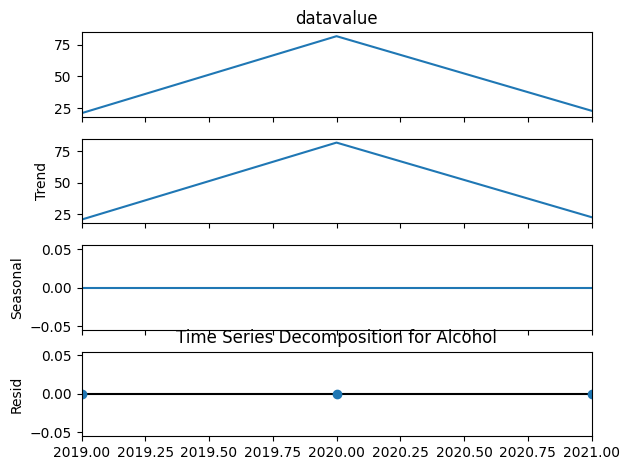

/home/danial/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/home/danial/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/danial/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



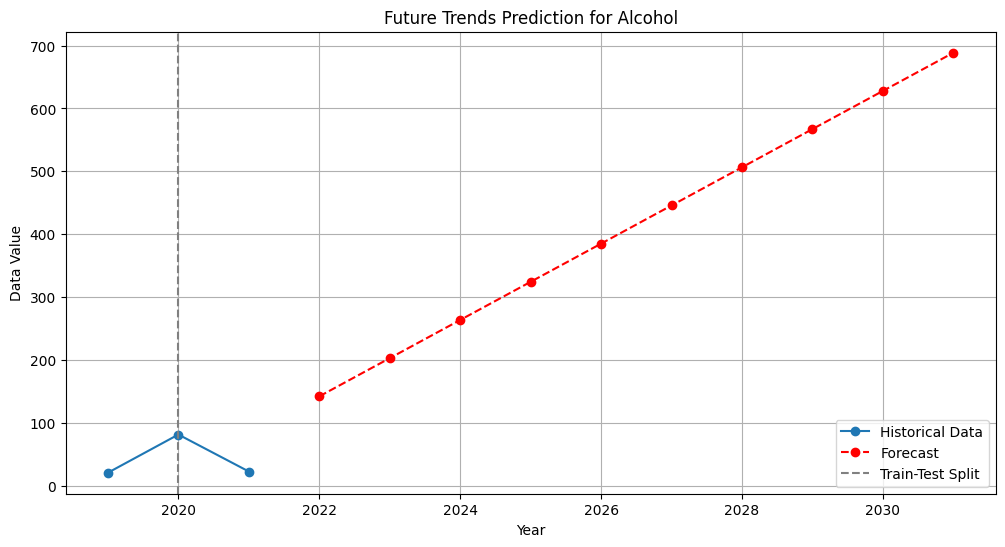

Mean Absolute Error (MAE) on test data: 119.45323244367356


/home/danial/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/danial/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [ ]:
# Load the dataset
data = pd.read_csv(path)  # replace with actual path

# Step 1: Filter data for a specific health indicator (e.g., "Cancer") Diabetes
indicator = "Alcohol"
indicator_data = data[data['topic'] == indicator]

# Ensure yearstart and datavalue are numeric
indicator_data['yearstart'] = pd.to_numeric(indicator_data['yearstart'], errors='coerce')
indicator_data['datavalue'] = pd.to_numeric(indicator_data['datavalue'], errors='coerce')

# Drop rows with missing values
indicator_data = indicator_data.dropna(subset=['yearstart', 'datavalue'])

# Step 2: Preprocess data
# Aggregate data by year (use mean for duplicate years if any)
time_series = indicator_data.groupby('yearstart')['datavalue'].mean()
print(len(time_series))
# Check if time_series has sufficient data points
if len(time_series) < 2:
    raise ValueError("Not enough data for time series forecasting. Please provide more data.")

# Step 3: Time series decomposition (optional)
# Only apply if there's a clear seasonal pattern, otherwise skip this part
try:
    decomposition = seasonal_decompose(time_series, model='additive', period=1)
    decomposition.plot()
    plt.title(f"Time Series Decomposition for {indicator}")
    plt.show()
except ValueError:
    print("Seasonal decomposition failed due to insufficient data or other reasons.")

# Step 4: Apply forecasting model (Exponential Smoothing)
# Split data into training and test sets (80-20 split)
train_size = int(len(time_series) * 0.8)
train_data = time_series[:train_size]
test_data = time_series[train_size:]

# Ensure the training data has more than one data point
if len(train_data) < 2:
    raise ValueError("Training data is too small for forecasting. Please provide more data.")

# Fit the model (no seasonality, but additive trend)
model = ExponentialSmoothing(
    train_data,
    trend='additive',  # Only use trend if no seasonality
    seasonal=None  # No seasonality
)

fitted_model = model.fit()

# Predict future trends
forecast_years = 10  # Number of years to forecast
future_years = np.arange(time_series.index[-1] + 1, time_series.index[-1] + 1 + forecast_years)
forecast = fitted_model.forecast(steps=forecast_years)

# Step 5: Visualize results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Historical Data', marker='o')
plt.plot(future_years, forecast, label='Forecast', linestyle='--', color='red', marker='o')
plt.axvline(x=train_data.index[-1], color='gray', linestyle='--', label='Train-Test Split')
plt.title(f"Future Trends Prediction for {indicator}")
plt.xlabel('Year')
plt.ylabel('Data Value')
plt.legend()
plt.grid()
plt.show()

# Step 6: Evaluate model on test data
# Predict on test set
predictions = fitted_model.forecast(steps=len(test_data))
mae = np.mean(np.abs(test_data.values - predictions))
print(f"Mean Absolute Error (MAE) on test data: {mae}")

### 1-e) Data Visualization: Create visual representations such as line charts, bar charts, or heatmaps to illustrate trends and patterns.

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv(path)

# Function to plot a bar chart for each topic
def plot_bar_for_topic(data):
    # Ensure 'datavalue' is numeric
    data['datavalue'] = pd.to_numeric(data['datavalue'], errors='coerce')

    # Drop rows with missing values in critical columns
    data = data.dropna(subset=['datavalue', 'locationdesc', 'topic', 'datavaluetype'])

    # Group the data by location and topic, and calculate the mean of datavalue
    grouped_data = data.groupby(['locationdesc', 'topic', 'datavaluetype'], as_index=False).agg({'datavalue': 'mean'})

    # Loop through each unique topic and plot the bar chart
    for topic in grouped_data['topic'].unique():
        # Filter data for the current topic
        topic_data = grouped_data[grouped_data['topic'] == topic]

        # Loop through each row (location and datavaluetype) for custom labels
        for _, row in topic_data.iterrows():
            datavaluetype = row['datavaluetype']  # Datavaluetype for this row
            location_data = topic_data[topic_data['datavaluetype'] == datavaluetype]

            # Create a bar chart using Plotly
            fig = px.bar(
                location_data,
                x='locationdesc', 
                y='datavalue',
                title=f"Average Data Value by Location for Topic: '{topic}'",
                labels={'locationdesc': 'Location', 'datavalue': f'Average {datavaluetype} Value'},
                color='locationdesc',  # Use color to differentiate the locations
                text='datavalue'  # Display the data value on the bars
            )

            # Customize layout for better display, including the dynamic y-axis title
            fig.update_layout(
                height=600,
                width=1000,
                xaxis_title='Location',
                yaxis_title=f'Average {datavaluetype} Value',  # Dynamically set y-axis title
                showlegend=False
            )

            # # Show the plot
            # fig.show()

            # Save the plot as an HTML file
            file_name = f"./bar_plots/{datavaluetype}_{topic}.html"  # Customize the filename as needed
            fig.write_html(file_name)

# Example usage
plot_bar_for_topic(data)

### 1-f) Cluster Analysis: Group states or regions based on their health profiles to identify similar patterns.

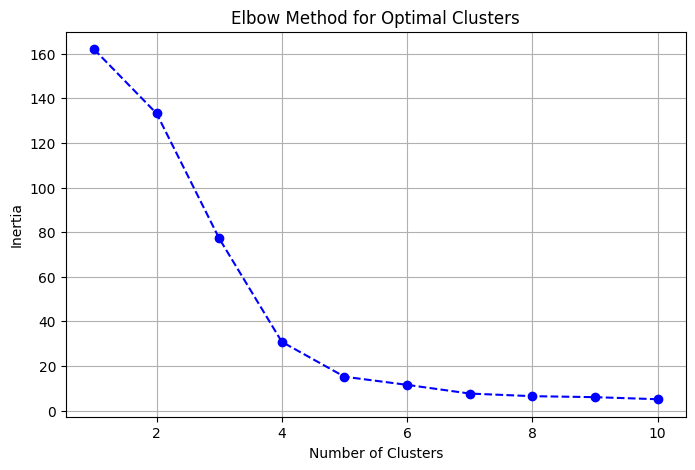

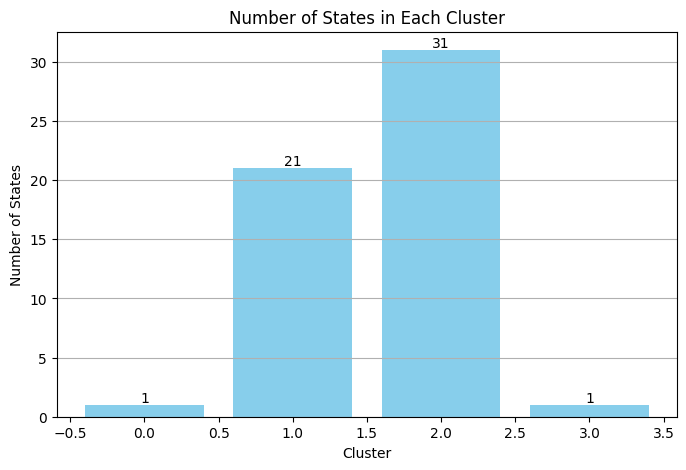


Cluster Profiles:
       datavalue  lowconfidencelimit  highconfidencelimit
0    746.480000          236.714286           279.185714
1    620.659919           53.963297            61.713512
2    567.372707          112.453979           123.274467
3  20152.866667           29.769231            31.484615


In [ ]:
# Load dataset
data = pd.read_csv(path)

# Select relevant features and group by states
state_features = data.groupby('locationdesc')[['datavalue', 'lowconfidencelimit', 'highconfidencelimit']].mean()

# Handle missing values (drop states with NaN in aggregated features)
state_features = state_features.dropna()

# Normalize the data
scaler = StandardScaler()
state_features_scaled = scaler.fit_transform(state_features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(state_features_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Fit K-Means with the optimal number of clusters (e.g., 3 clusters based on Elbow Method)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
state_cluster_labels = kmeans.fit_predict(state_features_scaled)

# Add cluster labels to the state features
state_features['Cluster'] = state_cluster_labels

# Visualize the number of states in each cluster
cluster_counts = state_features['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bar_plot = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.title('Number of States in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of States')

# Annotate bar heights
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

# Analyze cluster centers (profile of each cluster)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_profiles = pd.DataFrame(cluster_centers, columns=state_features.columns[:-1])  # Exclude 'Cluster' column
print("\nCluster Profiles:\n", cluster_profiles)

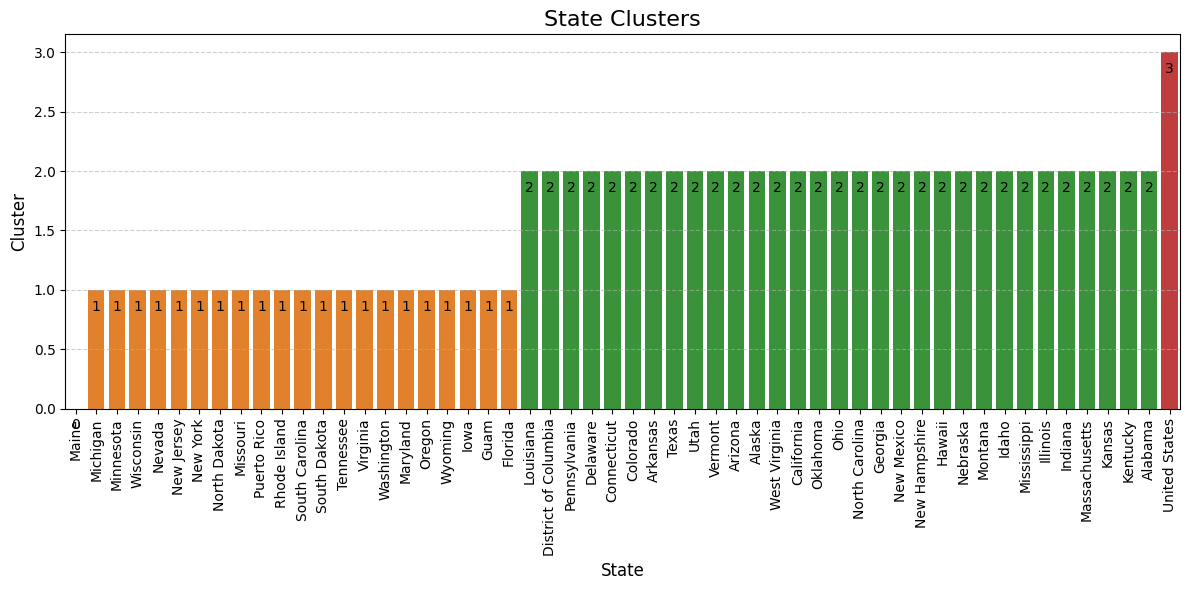

In [ ]:
# Reset index to include state names in the DataFrame
state_features.reset_index(inplace=True)

# Sort states by their cluster for better visualization
state_features_sorted = state_features.sort_values('Cluster')

# Create a bar plot showing clusters for each state
plt.figure(figsize=(12, 6))
sns.barplot(
    x='locationdesc', 
    y='Cluster', 
    hue='Cluster',  # Assign color by cluster
    data=state_features_sorted, 
    dodge=False,    # Ensure each state has a single bar
    palette='tab10',
    legend=False    # Disable legend
)

# Customize the plot
plt.title('State Clusters', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate the cluster labels on top of each bar
for i, bar in enumerate(plt.gca().patches):
    cluster_label = int(state_features_sorted.iloc[i]['Cluster'])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.2, 
             str(cluster_label), ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()

### Clustering

/tmp/ipykernel_47249/180515822.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_47249/180515822.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_47249/180515822.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



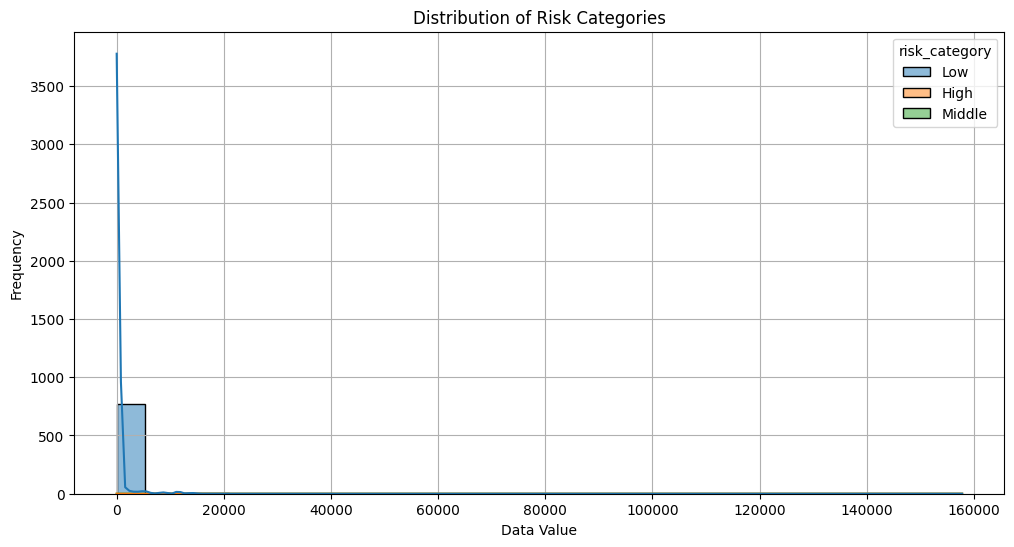

Cluster Summary:
  risk_category           mean           std       min       max
0          High  150947.500000   9697.969504  144090.0  157805.0
1           Low     358.556107   1429.870363       1.1   14573.0
2        Middle   30873.500000  14680.889833   17303.0   58044.0


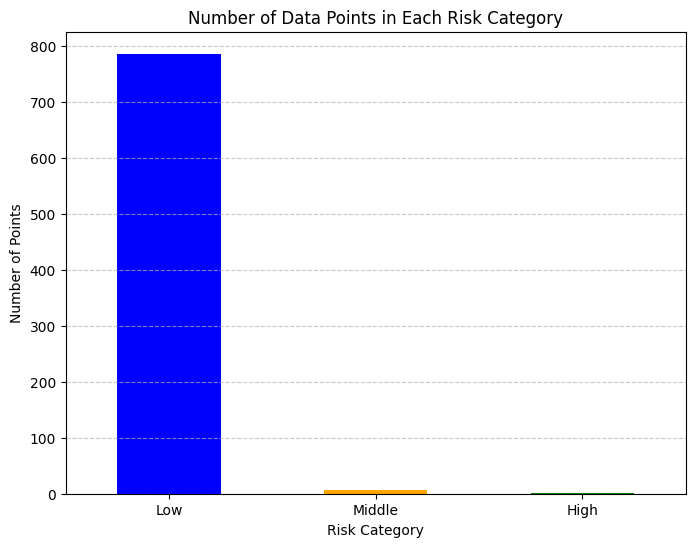

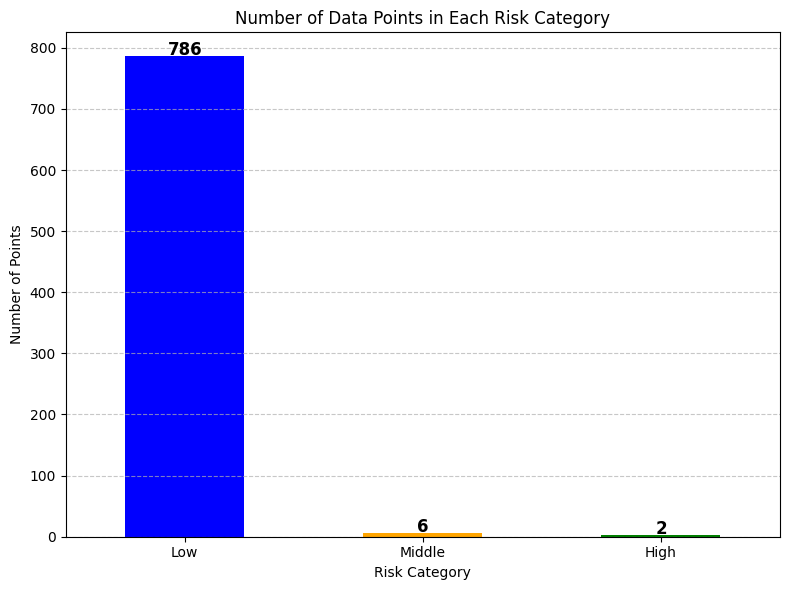

In [ ]:
# Load your dataset (replace 'path_to_your_data.csv' with the actual path)
data = pd.read_csv(path)

# Step 1: Filter relevant columns and preprocess data
# Ensure 'datavalue' is numeric
data['datavalue'] = pd.to_numeric(data['datavalue'], errors='coerce')

# Drop rows with missing 'datavalue'
data_filtered = data.dropna(subset=['datavalue'])

# Normalize the 'datavalue'
scaler = StandardScaler()
data_filtered['scaled_datavalue'] = scaler.fit_transform(data_filtered[['datavalue']])

# Step 2: Apply K-Means clustering
# Number of clusters (Low, Middle, High)
kmeans = KMeans(n_clusters=3, random_state=42)
data_filtered['cluster'] = kmeans.fit_predict(data_filtered[['scaled_datavalue']])

# Map cluster labels to categories
# Sort clusters by mean datavalue to assign correct labels
cluster_means = data_filtered.groupby('cluster')['datavalue'].mean().sort_values()
cluster_mapping = {cluster: idx for idx, cluster in enumerate(cluster_means.index)}
category_mapping = {0: 'Low', 1: 'Middle', 2: 'High'}

# Map cluster to category
data_filtered['risk_category'] = data_filtered['cluster'].map(cluster_mapping).map(category_mapping)

# Step 3: Visualize results
plt.figure(figsize=(12, 6))
sns.histplot(data_filtered, x='datavalue', hue='risk_category', bins=30, kde=True)
plt.title('Distribution of Risk Categories')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
# plt.legend(title='Risk Category')
plt.grid()
plt.show()

# Step 4: Analyze cluster statistics
summary = data_filtered.groupby('risk_category')['datavalue'].agg(['mean', 'std', 'min', 'max']).reset_index()
print("Cluster Summary:")
print(summary)

# Save results if needed
data_filtered.to_csv('clustered_health_data.csv', index=False)

# Count the number of points in each risk category
cluster_counts = data_filtered['risk_category'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Number of Data Points in Each Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Number of Points')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

import matplotlib.pyplot as plt

# Count the number of points in each risk category
cluster_counts = data_filtered['risk_category'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
bar_plot = cluster_counts.plot(kind='bar', color=['blue', 'orange', 'green'])

# Add annotations on top of the bars
for index, value in enumerate(cluster_counts):
    plt.text(index, value + 2, str(value), ha='center', fontsize=12, fontweight='bold')

# Customize the plot
plt.title('Number of Data Points in Each Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Number of Points')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Load your dataset
data = pd.read_csv(path)  # Replace with your dataset
topics = data['topic'].unique()  # Get unique topics

# Prepare a scaler
scaler = MinMaxScaler()

# Iterate through each topic
for topic in topics:
    # print(f"Processing topic: {topic}")
    
    # Filter data for the current topic
    topic_data = data[data['topic'] == topic].copy()
    
    # Ensure 'datavalue' is numeric and drop missing values
    topic_data['datavalue'] = pd.to_numeric(topic_data['datavalue'], errors='coerce')
    topic_data = topic_data.dropna(subset=['datavalue'])
    
    # Check if the number of samples is sufficient for clustering
    if len(topic_data) < 3:
        print(f"Skipping topic {topic}: Not enough data points for clustering (n={len(topic_data)})")
        continue
    
    # Scale the data
    scaled_values = scaler.fit_transform(topic_data[['datavalue']])
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    topic_data['cluster'] = kmeans.fit_predict(scaled_values)
    
    # Map clusters to risk categories
    cluster_mapping = {0: 'Low', 1: 'Middle', 2: 'High'}
    topic_data['risk_category'] = topic_data['cluster'].map(cluster_mapping)
    
    # Count the number of points in each cluster
    cluster_counts = topic_data['risk_category'].value_counts()
    
    # Plot a bar chart
    plt.figure(figsize=(8, 6))
    bar_plot = cluster_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
    
    # Add annotations on top of the bars
    for index, value in enumerate(cluster_counts):
        plt.text(index, value, str(value), ha='center', fontsize=12, fontweight='bold')
    
    # Customize the plot
    plt.title(f'Number of Data Points in Each Risk Category for Topic: {topic}')
    plt.xlabel('Risk Category')
    plt.ylabel('Number of Points')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # plt.show()

    # Save the plot to a file
    filename = f"./clustering/{topic}_risk_category_plot.png"
    plt.savefig(filename)
    # print(f"Plot saved as: {filename}")
    plt.close()  # Close the figure to free memory

Skipping topic Nutrition, Physical Activity, and Weight Status: Not enough data points for clustering (n=1)


### 2) Neural Network Model

Processing topic: Diabetes
Processing topic: Sleep
Processing topic: Asthma
Processing topic: Health Status
Processing topic: Mental Health
Processing topic: Alcohol
Processing topic: Arthritis
Processing topic: Tobacco
Processing topic: Disability
Processing topic: Immunization
Processing topic: Oral Health
Processing topic: Nutrition, Physical Activity, and Weight Status
Skipping topic Nutrition, Physical Activity, and Weight Status: Not enough data points for clustering.
Processing topic: Cancer
Epoch 1/50


/home/danial/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2276 - loss: 36.3682 - val_accuracy: 0.1417 - val_loss: 6.4926
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0802 - loss: 21.1786 - val_accuracy: 0.1181 - val_loss: 8.2252
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1066 - loss: 17.5771 - val_accuracy: 0.3622 - val_loss: 3.5669
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5195 - loss: 8.8205 - val_accuracy: 0.3701 - val_loss: 8.5924
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3145 - loss: 12.0849 - val_accuracy: 0.8740 - val_loss: 0.9591
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6745 - loss: 8.9345 - val_accuracy: 0.7795 - val_loss: 4.6090
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7027 - loss: 7.8731 - val_accuracy: 0.5276 - val_loss: 12.6755
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4955 - loss: 21.4699 - val_accuracy: 0.5748 - val_loss: 1.8

/home/danial/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/danial/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/danial/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/danial/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

Bar plot saved as 'predicted_vs_actual.png'


<Figure size 1200x600 with 0 Axes>

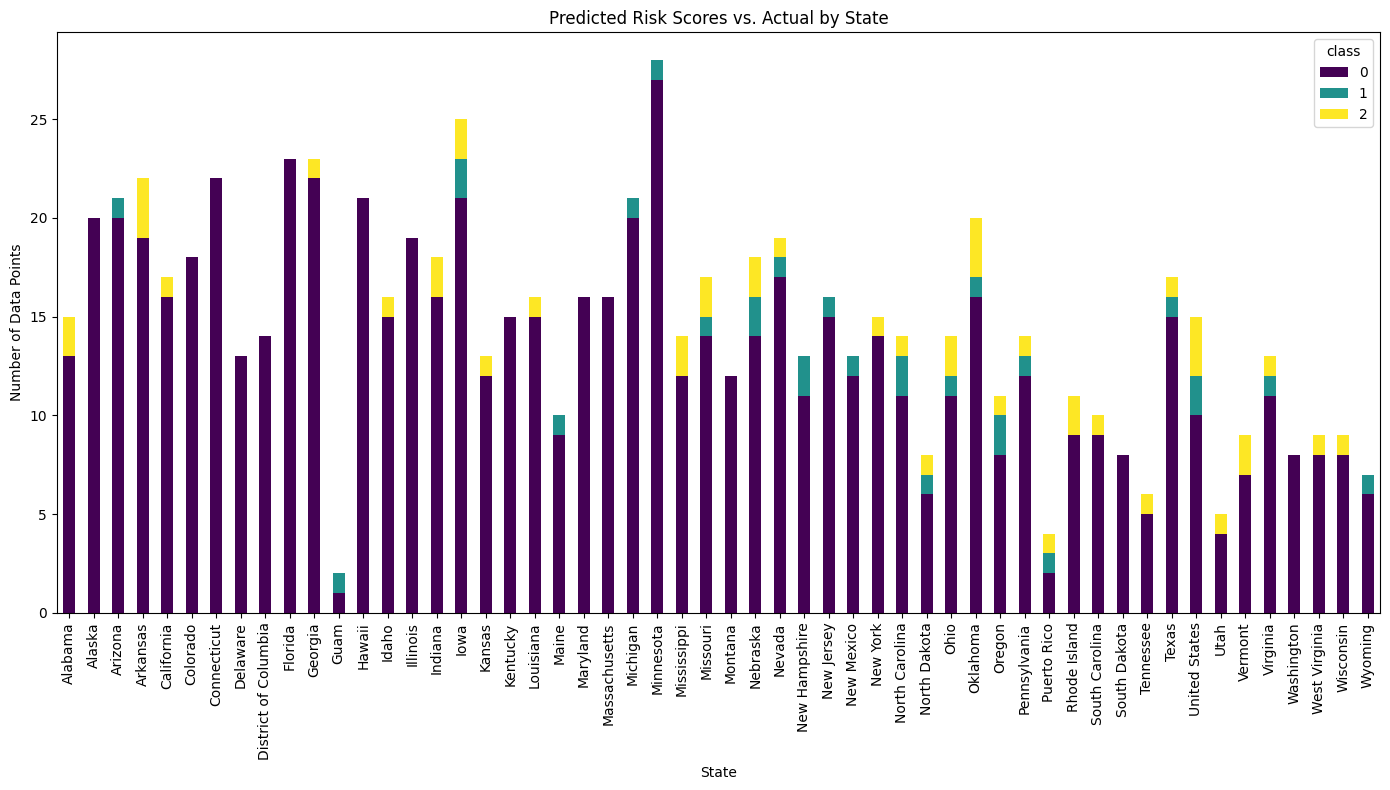

In [ ]:
# Load dataset
data = pd.read_csv(path)  # Replace with your dataset
topics = data['topic'].unique()

# Initialize scaler
scaler = MinMaxScaler()

# Clustering and adding 'class' column
all_data = []

for topic in topics:
    print(f"Processing topic: {topic}")
    topic_data = data[data['topic'] == topic].copy()

    # Ensure 'datavalue' is numeric
    topic_data['datavalue'] = pd.to_numeric(topic_data['datavalue'], errors='coerce')
    topic_data = topic_data.dropna(subset=['datavalue'])
    
    # Skip if not enough data
    if len(topic_data) < 3:
        print(f"Skipping topic {topic}: Not enough data points for clustering.")
        continue
    
    # Scale the data
    scaled_values = scaler.fit_transform(topic_data[['datavalue']])
    
    # Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    topic_data['cluster'] = kmeans.fit_predict(scaled_values)
    
    # Plot the bar chart for the number of samples in each cluster
    cluster_counts = topic_data['cluster'].value_counts()
    plt.figure(figsize=(8, 6))
    cluster_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
    plt.title(f"Cluster Distribution for Topic: {topic}")
    plt.xlabel("Cluster")
    plt.ylabel("Number of Samples")
    
    # Add counts on top of the bars
    for idx, count in enumerate(cluster_counts):
        plt.text(idx, count, str(count), ha='center', va='bottom', fontsize=10)
    
    # Save the plot to a file
    filename = f"./clustering/{topic}_risk_category_plot.png"
    plt.savefig(filename)
    # print(f"Plot saved as: {filename}")
    plt.close()  # Close the figure to free memory

    # Map clusters to risk categories
    topic_data['class'] = topic_data['cluster']
    all_data.append(topic_data)

# Combine all processed data
final_data = pd.concat(all_data, ignore_index=True)

# Prepare data for classification
features = ['datavalue']  # Add more features if available
X = final_data[features].values
y = final_data['class'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Build a neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Visualize Predictions vs. Actual
final_data['state'] = final_data['locationdesc']  # Assuming locationdesc represents state
state_data = final_data.groupby(['state', 'class']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
state_data.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='viridis')
plt.title("Predicted Risk Scores vs. Actual by State")
plt.xlabel("State")
plt.ylabel("Number of Data Points")
plt.tight_layout()
# plt.savefig("predicted_vs_actual.png")
print("Bar plot saved as 'predicted_vs_actual.png'")